In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
N, D_in, H, D_out = 2, 100, 50, 1

In [95]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


In [96]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [97]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])

    loss = np.square(y_pred -y).sum()
    loss_list.append(loss)
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred -y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 2280.428085461618
1 2241.3337114696287
2 2202.918473201029
3 2165.170277975193
4 2128.0772587969495
5 2091.627769781435
6 2055.8103816840535
7 2020.6138775325835
8 1986.0272483589065
9 1952.0396890275229
10 1918.6405941584821
11 1885.8195541421208
12 1853.5663512432784
13 1821.8709557926313
14 1790.7235224629212
15 1760.1143866278312
16 1730.0340608014515
17 1700.4732311562261
18 1671.4227541173825
19 1642.873653031963
20 1614.8171149104649
21 1587.2444872393767
22 1560.1472748627425
23 1533.517136931097
24 1507.3458839160553
25 1481.6254746889422
26 1456.3480136619028
27 1431.50574798992
28 1407.091064832298
29 1383.0964886721094
30 1359.5146786922535
31 1336.3384262067102
32 1313.5606521457066
33 1291.1744045934433
34 1269.1728563772067
35 1247.5493027065618
36 1226.2971588614841
37 1205.4099579282915
38 1184.8813485822016
39 1164.7050929154516
40 1144.8750643099397
41 1125.3852453532877
42 1106.2297257974014
43 1087.4027005584774
44 1068.8984677575475
45 1050.711426800614
46 1032.

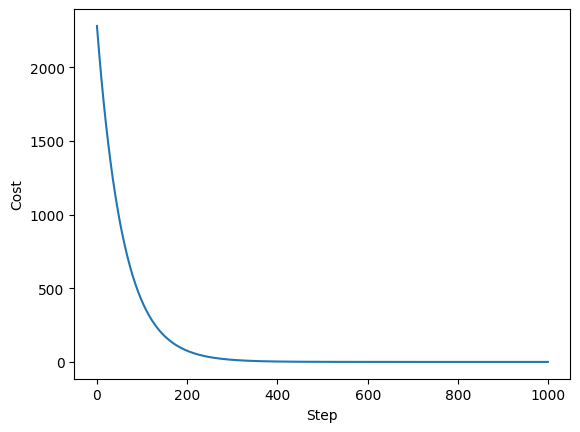

In [99]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Step')
plt.show()